<a href="https://colab.research.google.com/github/edhurtado/data-engineering-bootcamp/blob/main/Wizeline_Data_Engineering_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Libraries

In [11]:
!pip install "dask[complete]"

     |████████████████████████████████| 125 kB 34.5 MB/s 
     |████████████████████████████████| 786 kB 60.3 MB/s 
     |████████████████████████████████| 779 kB 63.8 MB/s 
     |████████████████████████████████| 778 kB 53.1 MB/s 
     |████████████████████████████████| 776 kB 71.6 MB/s 
     |████████████████████████████████| 769 kB 56.8 MB/s 
     |████████████████████████████████| 766 kB 68.5 MB/s 
     |████████████████████████████████| 1.0 MB 22.7 MB/s 
     |████████████████████████████████| 722 kB 72.8 MB/s 
     |████████████████████████████████| 722 kB 73.2 MB/s 
     |████████████████████████████████| 715 kB 74.4 MB/s 
     |████████████████████████████████| 705 kB 58.3 MB/s 
     |████████████████████████████████| 699 kB 58.0 MB/s 
     |████████████████████████████████| 696 kB 54.1 MB/s 
     |████████████████████████████████| 684 kB 45.3 MB/s 
     |████████████████████████████████| 679 kB 44.2 MB/s 
     |████████████████████████████████| 675 kB 58.3 MB/s 
     |████████

#Importing Libraries

In [265]:
from google.colab import drive
from google.colab import files
import pandas as pd
import dask
import dask.dataframe as dd
import dask.array as da
import dask.bag as db
import numpy as np
from scipy import stats
from sklearn import preprocessing
import seaborn as sns
#!apt-get install rar

#Importing Data

##Download Giant File

In [3]:
#File URL ---> https://drive.google.com/file/d/1crFR4yrS_6DV3_Fh-HrhANJg1-qlyE-O/view
#File ID Google Drive ---> 1crFR4yrS_6DV3_Fh-HrhANJg1-qlyE-O
ID = "1crFR4yrS_6DV3_Fh-HrhANJg1-qlyE-O"

#Downloading Data
!gdown --id $ID

Downloading...
From: https://drive.google.com/uc?id=1crFR4yrS_6DV3_Fh-HrhANJg1-qlyE-O
To: /content/profeco.zip
100% 1.61G/1.61G [00:11<00:00, 137MB/s]


##Unzipping File

In [6]:
!unzip "profeco.zip" -d "/content"

Archive:  profeco.zip
  inflating: /content/all_data.csv   


##Using Dask to import Data

In [21]:
Data = dd.read_csv("all_data.csv",blocksize=100e6,dtype='object')

In [23]:
Size = Data.size.compute()

In [27]:
print("The size of the data is %d" %(Size))

The size of the data is 937960725


In [14]:
Data.head().compute()

,producto,presentacion,marca,categoria,catalogo,precio,fechaRegistro,cadenaComercial,giro,nombreComercial,direccion,estado,municipio,latitud,longitud
0,CUADERNO FORMA ITALIANA,96 HOJAS PASTA DURA. CUADRICULA CHICA,ESTRELLA,MATERIAL ESCOLAR,UTILES ESCOLARES,25.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
1,CRAYONES,CAJA 12 CERAS. JUMBO. C.B. 201423,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,27.5,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
2,CRAYONES,CAJA 12 CERAS. TAMANO REGULAR C.B. 201034,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,13.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
3,COLORES DE MADERA,CAJA 12 PIEZAS LARGO. TRIANGULAR. C.B. 640646,PINCELIN,MATERIAL ESCOLAR,UTILES ESCOLARES,46.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
4,COLOR LARGO,CAJA 36 PIEZAS. CON SACAPUNTAS. 68-4036,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,115.0,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417


#Q1: How many commercial chains are monitored, and therefore, included in this database?

In [28]:
#Getting al unique values
comChains = Data["cadenaComercial"].unique().compute()

In [275]:
print("There are up to %d commercial chains monitored by Profeco" % (comChains.count()))

There are up to 705 commercial chains monitored by Profeco


In [274]:
comChains

0                            ABASTECEDORA LUMEN
1                            COMERCIAL MEXICANA
2                                  I.S.S.S.T.E.
3                                      WAL-MART
4                    TORTILLERIAS TRADICIONALES
                         ...                   
701    MERCADO  GENERAL EMILIANO ZAPATA SALAZAR
702                       PESCADERIA EL MALECON
703                        BOTICA KENT TLAXCALA
704               MUEBLERIA ALMACENES DEL NORTE
705                     MINISUPER MERCADO TOGUZ
Name: cadenaComercial, Length: 706, dtype: object

#Q2: What are the top 10 monitored products by State?

In [48]:
groupedData = Data.groupby(by=["estado","producto"]).count().compute()

In [88]:
groupedData.reset_index()[["estado","producto","marca"]].groupby(by=["estado"]).apply(lambda x: x.nlargest(10,['marca']))[["producto","marca"]]


producto  marca
estado                                              
AGUASCALIENTES 210                        FUD  12005
               164          DETERGENTE P/ROPA  10188
               277    LECHE ULTRAPASTEURIZADA   9824
               416                    SHAMPOO   9654
               388                   REFRESCO   9481
...                                       ...    ...
ZACATECAS      10709                  SHAMPOO  15012
               10398           CHILES EN LATA  14866
               10418     COMPONENTES DE AUDIO  14799
               10679                 REFRESCO  13925
estado         28842                 producto     20

[321 rows x 2 columns]

#Q3: Which is the commercial chain with the highest number of monitored products?

In [94]:
comChainProd = Data.groupby(by=["cadenaComercial","producto"]).count().compute()

In [147]:
comChainProd["marca"].nlargest(1)

cadenaComercial             producto        
TORTILLERIAS TRADICIONALES  TORTILLA DE MAIZ    206950
Name: marca, dtype: int64

In [146]:
comChainProd.reset_index().groupby("cadenaComercial").count().nlargest(1,"producto")["producto"]#.values[0]

cadenaComercial
SORIANA    1059
Name: producto, dtype: int64

In [145]:
print("******---------------------------------------------------------------------------------------------------******\n")
print("The commercial chain with and the product that Profeco has monitored the most is \n Comercial Chain: %s \n Product: %s \n Number of products monitored: %d" % (comChainProd["marca"].nlargest(1).reset_index()["cadenaComercial"][0],comChainProd["marca"].nlargest(1).reset_index()["producto"][0],comChainProd["marca"].nlargest(1)[0]))
print("\n******---------------------------------------------------------------------------------------------------******\n")
print("However, the comercial chain with the highest number of monitored products is:\n Comercial Chain: %s \n Number of different products monitored by profeco: %d " % (comChainProd.reset_index().groupby("cadenaComercial").count().nlargest(1,"producto")["producto"].reset_index()["cadenaComercial"][0],comChainProd.reset_index().groupby("cadenaComercial").count().nlargest(1,"producto")["producto"].values[0]))
print("\n******---------------------------------------------------------------------------------------------------******\n")

******---------------------------------------------------------------------------------------------------******

The commercial chain with and the product that Profeco has monitored the most is 
 Comercial Chain: TORTILLERIAS TRADICIONALES 
 Product: TORTILLA DE MAIZ 
 Number of products monitored: 206950

******---------------------------------------------------------------------------------------------------******

However, the comercial chain with the highest number of monitored products is:
 Comercial Chain: SORIANA 
 Number of different products monitored by profeco: 1059 

******---------------------------------------------------------------------------------------------------******



#Q4: Use the data to find an interesting fact.

In [97]:
cat = Data["categoria"].unique().compute()

In [156]:
print("All %d registers of the database is distribuited in only %d categories.\nthat roughly would be %d registers per category" % (Size, len(cat), Size/len(cat) ))

All 937960725 registers of the database is distribuited in only 42 categories.
that roughly would be 22332398 registers per category


In [98]:
precProd = Data[["categoria","producto","precio"]].groupby(by=["categoria","producto"]).max().compute()

In [181]:
#precProd.reset_index()["precio"].astype(float)
print("The product which is the most expensive according data is %.2f" % (max(pd.to_numeric(precProd.reset_index()["precio"],errors='coerce'))))


The product which is the most expensive according data is 99999.20


99999.2

As we can see, the first digit of more than 700 products is 9, that's means almost 
every comercial chain makes uses of rounded prices marketing strategy, for example
they define a price of 999 instead of 1,000 which is more atractive to customers in terms of marketing

 This also could be a sign of off sales


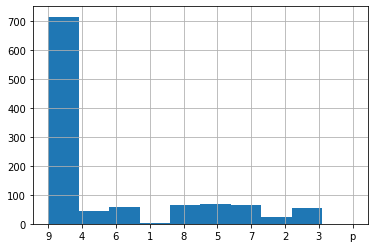

In [190]:
precProd.reset_index()["precio"].str[0].hist()
print("As we can see, the first digit of more than 700 products is 9, that's means almost \nevery comercial chain makes uses of rounded prices marketing strategy, for example\nthey define a price of 999 instead of 1,000 which is more atractive to customers in terms of marketing")
print("\n This also could be a sign of off sales")

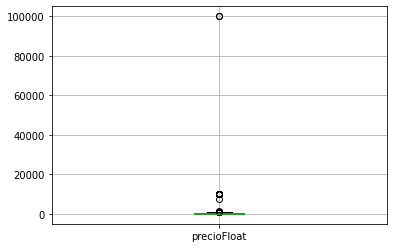

In [213]:
#precProd.reset_index()["precio"].mean()
prod = precProd.reset_index()
prod["precioFloat"] = pd.to_numeric(precProd.reset_index()["precio"],errors='coerce')
prod.boxplot(column="precioFloat")

print("\n\nAs we can see our data distribution is centered on MXN$0 (low price products), however there are some \nproducts that are outliers, their price is too larger than the rest of the products")

If we filter on 1 standard deviation to avoid outlier we obtain this box-plot, where we can see that 
most of data es centered around MXN$250


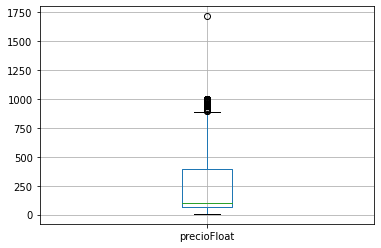

In [238]:
prodNoOutlier = prod[np.abs(prod.precioFloat-prod.precioFloat.mean()) <= (1*prod.precioFloat.std())]
prodNoOutlier.boxplot(column="precioFloat")
print("If we filter on 1 standard deviation to avoid outlier we obtain this box-plot, where we can see that \nmost of data es centered around MXN$250\n\n")

In [252]:
prod["precioFloat"].mean()
prod["precioFloat"].max()
prod["precioFloat"].min()
prod["precioFloat"].median()
prod["precioFloat"].mode()
print("Analyzing the data's EDA central tendency meassures:\nMean: %f\nMedian: %f\nMode: %f\nMin: %f\nMax: %f"%(prod["precioFloat"].mean(), prod["precioFloat"].median(),prod["precioFloat"].mode(),prod["precioFloat"].min(),prod["precioFloat"].max() ))
print("We can conclude that:\n\t- All our data is centered to MXN$100\n\t- It has larger outliers \n\t- The data must require an extra processing to produce insights")
#All valid measurements of central tendency are the mean, median, and mode.

Analyzing the data's EDA central tendency meassures:
Mean: 563.365561
Median: 99.900000
Mode: 99.900000
Min: 6.000000
Max: 99999.200000
We can conclude that:
	- All our data is centered to MXN$100
	- It has larger outliers 
	- The data must require an extra processing to produce insights


(<matplotlib.axes._subplots.AxesSubplot at 0x7f01939d60d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f01939d60d0>)

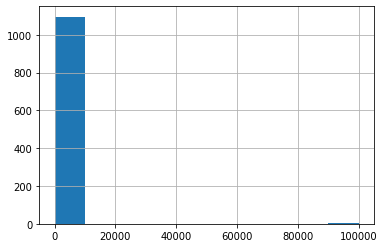

In [272]:
prod["precioFloat"].hist()
#,np.abs( (prod.precioFloat-prod.precioFloat.mean() )/prod.precioFloat.std()).hist()
# = (x – μ) / σ

#Q5: What are the lessons learned from this exercise?

For me, this exercise teach me so many things. I'm going to state them: 


1.   _I don't know how it is possible to finish this task in 3 hrs taking in mind that dataset is up to 20GB_, for this data size it would take all these time only processing and working with
2.   Python is a powerfull tool! It has library for almost everything, however for this amount of data (20GB) it would be too difficult to handle it
3.   I try to use pure pandas and I also try to work in a local environment but, when I understood the amount of data that is covered by 20GB I got up trying to use my local computer (It doesn't deserve this kind of punishment 😂) and I started to use cloud solutions using the powerful computers of Google.
4.   As I've worked with _**SQL**_ querying making some _**OLAP**_, I know this kind of analysis could be achieved easier with querying or at least I could prepare the data a little bit better 
5.   I'd say that using Python for this kind of analysis (EDA) is not the best way to 

#Q6: Can you identify other ways to approach this problem? Explain

If I was on my own, I would try to find another way to make this analysis faster or easier.

For example, based on my experience, I'd try to upload all this data (through python or any other tool) to a RDBMS and use SQL to modify, prepare, transform and/or analyse such data. I've worked in my job handling million of data with queries and it's quite faster than pandas and Python.

Another approach that I'd try to is using Hadoop or Spark to partition data and handling it easier.